# Simple Neural Net using Tensorflow2

### Import required packages

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow import keras
import tensorflow as tf

### Dataset Generation

In [3]:
# Parameters (y = a1*x1 + a2*x2 + a3*x1*x1 + a4*x2*x2 + a5*x1*x2 + b)
a1 = 2.7
a2 = 3.5
a3 = 0.6
a4 = 0.6
a5 = -1.4
b  = 2.0

In [4]:
# Create noisy data
x1_data = np.linspace(-10, 10, num=100000)

x2_data = np.linspace(-10, 10, num=100000)

y_data = a1 * x1_data + \
    a2 * x2_data + \
    a3 * x1_data * x1_data +\
    a4 * x1_data * x1_data +\
    a5 * x1_data * x1_data +\
    b +\
    np.random.normal(size=100000)

In [5]:
x_data = []
for x1,x2 in zip(x1_data,x2_data):
    x_data.append([x1,x2])
x_data = np.array(x_data)

### Build the neuralnet

In [6]:
# Create the model 
model = keras.Sequential()

model.add(keras.layers.InputLayer(input_shape=(2,)))
model.add(keras.layers.Dense(units = 4, activation = 'relu'))
model.add(keras.layers.Dense(units = 3, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))

In [7]:
# Define Loss and Optimizer

# Stocastic Gradient Descent
#model.compile(loss='mse', optimizer= keras.optimizers.SGD(learning_rate=1e-2))

# Adam
model.compile(loss='mse', optimizer= keras.optimizers.Adam(learning_rate=1e-3))

In [8]:
# Display the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Learn

epochs = 10
batch_size = 32

model_returns = model.fit(x_data, y_data, epochs=epochs, batch_size=batch_size, verbose=1 )

Epoch 1/10
3125/3125 [==============================] - 5s 1ms/step - loss: 157.7476
Epoch 2/10
3125/3125 [==============================] - 4s 1ms/step - loss: 3.7014A: 0s - loss: 3.71
Epoch 3/10
3125/3125 [==============================] - 5s 1ms/step - loss: 2.9703
Epoch 4/10
3125/3125 [==============================] - 4s 1ms/step - loss: 2.6255
Epoch 5/10
3125/3125 [==============================] - 4s 1ms/step - loss: 2.3721
Epoch 6/10
3125/3125 [==============================] - 4s 1ms/step - loss: 2.1978A: 2s - loss: 2.2 - ETA: 
Epoch 7/10
3125/3125 [==============================] - 4s 1ms/step - loss: 2.0830
Epoch 8/10
3125/3125 [==============================] - 5s 1ms/step - loss: 2.0089
Epoch 9/10
3125/3125 [==============================] - 4s 1ms/step - loss: 1.9524
Epoch 10/10
3125/3125 [==============================] - 5s 1ms/step - loss: 1.9118


In [10]:
# Predict (compute) the output 
y_predicted = model.predict(x_data)
y_predicted = y_predicted.squeeze()

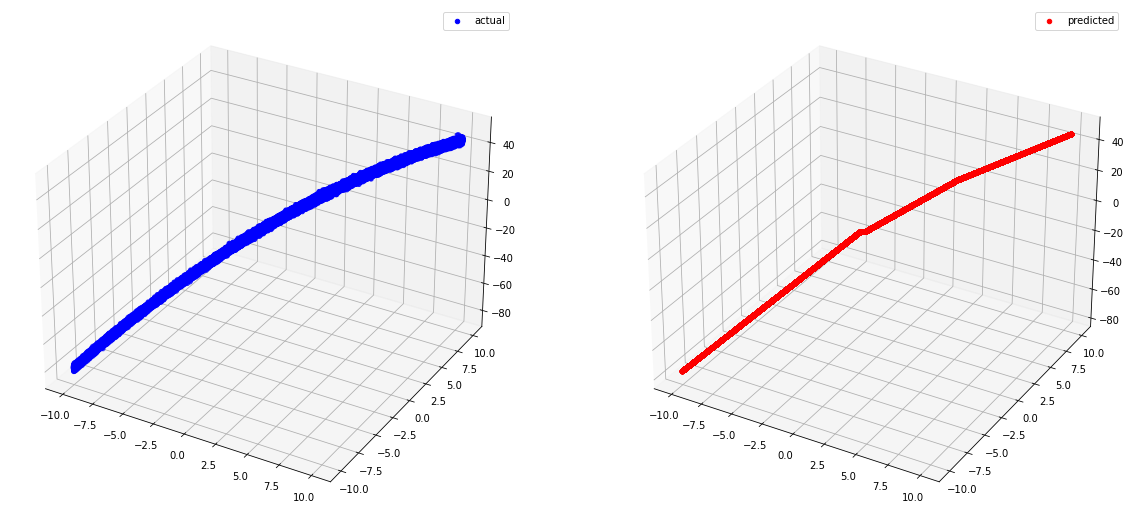

In [11]:
# Plot the data
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter3D(x1_data, x2_data, y_data, label="actual", c='b')
plt.legend()

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(x1_data, x2_data, y_predicted, label="predicted", c='r')
plt.legend()

plt.show()

#### To use GPU or CPU specifically

In [ ]:
## Get list of available devices
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

In [ ]:
## For GPU
with tf.device('/gpu:0'):
    model_returns = model.fit(x_data, y_data, epochs=10, verbose=1)

with tf.device('/gpu:0'):
    y_predicted = model.predict(x_data)

In [ ]:
## For CPU
with tf.device('/cpu:0'):
    model_returns = model.fit(x_data, y_data, epochs=10, verbose=1)

with tf.device('/cpu:0'):
    y_predicted = model.predict(x_data)